In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from matplotlib import style

In [2]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

# 막대 그래프로 데이터 표현시 색깔 지정
my_colors = 'bgrbymcgrgymc'
my_colors2 = 'br'

In [3]:
# 1. 서울시 가구형태별 가구 및 가구원(동별) 통계

In [4]:
df = pd.read_excel("서울시 가구형태별 가구 및 가구원(동별) 통계.xls")
df.head(6)

,기간,자치구,동,총가구,총가구.1,총가구.2,총가구.3,일반가구,일반가구.1,일반가구.2,...,집단가구.2,집단가구.3,집단가구.4,집단가구.5,집단가구.6,집단가구.7,외국인가구,외국인가구.1,외국인가구.2,외국인가구.3
0,기간,자치구,동,총가구,총가구,총가구,총가구,일반가구,일반가구,일반가구,...,비혈연 6인이상 가구,비혈연 6인이상 가구,집단시설가구,집단시설가구,집단시설가구,집단시설가구,외국인가구,외국인가구,외국인가구,외국인가구
1,기간,자치구,동,가구수,가구원수,가구원수,가구원수,가구수,가구원수,가구원수,...,가구원수,가구원수,가구수,가구원수,가구원수,가구원수,가구수,가구원수,가구원수,가구원수
2,기간,자치구,동,가구수,계,남자,여자,가구수,계,남자,...,남자,여자,가구수,계,남자,여자,가구수,계,남자,여자
3,2015,합계,합계,3914820,9904312,4859535,5044777,3784490,9394807,4555632,...,8471,8282,772,82267,36754,45513,128069,262718,131533,131185
4,2015,종로구,소계,68429,161521,79510,82011,61580,140595,68165,...,316,317,34,4128,2164,1964,6743,12521,6166,6355
5,2015,종로구,사직동,3897,9379,4325,5054,3562,8402,3819,...,11,17,X,107,45,62,328,600,283,317


In [5]:
# - 막대그래프로 x축은 구, y축은 가구 수(일반가구, 집단가구, 외국인가구)로 해서나타내기

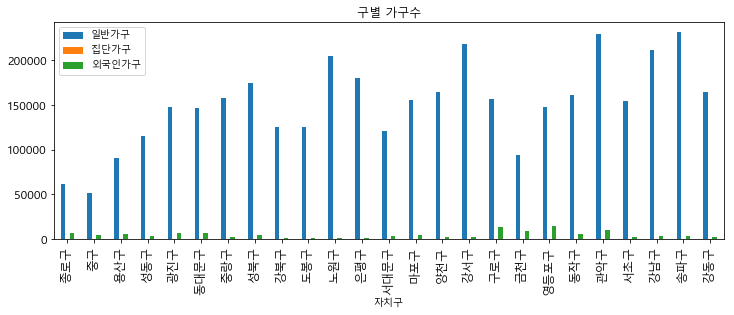

In [6]:
df_sample = df.loc[:,['자치구','동','총가구','일반가구','집단가구','외국인가구']]
df_sample2 = df_sample[df_sample['동'] == '소계']
del df_sample2['동']
del df_sample2['총가구']
df_sample3 = df_sample2.set_index("자치구")
ax = df_sample3.plot(kind='bar', title='구별 가구수', figsize=(12, 4), legend=True, fontsize=12)

In [7]:
# 1) 서울시에서 일반 가구가 가장 많은 구는 어디고 그 구에서 일반 가구가 가장 많은 동은 어디일까?

In [8]:
df_first = df.loc[:,['자치구','동','일반가구']]
df_first = df_first.drop([0,1,2,3],0)
df_first = df_first.reset_index(drop = True) 
df_first['일반가구'] = df_first['일반가구'].astype('int64')
df_first['일반가구'].idxmax()

402

In [9]:
print(df_first.iloc[df_first['일반가구'].idxmax()]) 
#일반가구수가 가장 많은 구

자치구        송파구
동           소계
일반가구    230941
Name: 402, dtype: object


In [10]:
df_first = df_first[(df_first['자치구'] == '송파구')]
df_first = df_first.drop(402,0)
df_first = df_first.reset_index(drop = True) 
df_first['일반가구'] = df_first['일반가구'].astype('int64')
df_first['일반가구'].idxmax()

12

In [11]:
print(df_first.iloc[df_first['일반가구'].idxmax()]) 
#송파구에서 일반가구가 가장 많은 동

자치구       송파구
동         석촌동
일반가구    14241
Name: 12, dtype: object


In [12]:
# 2) 서울시에서 어느 구가 각각 일반 가구, 집단 가구, 외국인 가구 비율이 가장 높은지 알아내고 그것을 파이그래프로 표현

In [13]:
df_sample = df_sample[df_sample['동'] == '소계']
df_sample = df_sample.reset_index(drop = True) 
df_ = df_sample.reset_index(drop = True) 
del df_sample['동']

In [14]:
max_rate1 = 0
for i in range(len(df_sample)):
    rate1 = (df_sample['일반가구'][i] / df_sample['총가구'][i]) * 100
    if(max_rate1 < rate1):
        max_rate1 = rate1
print('%.3f' %max_rate1) # 일반 가구 비율이 가장 높은 구의 비율

99.391


In [15]:
for i in range(len(df_sample)):
    rate1 = (df_sample['일반가구'][i] / df_sample['총가구'][i]) * 100
    if(max_rate1 == rate1):
        print(df_sample.loc[i]) # 일반 가구 비율이 가장 높은 구
        df_second_1 = df_sample.loc[i]

자치구         노원구
총가구      206092
일반가구     204836
집단가구         62
외국인가구      1162
Name: 10, dtype: object


In [16]:
max_rate2 = 0
for i in range(len(df_sample)):
    rate2 = (df_sample['집단가구'][i] / df_sample['총가구'][i]) * 100
    if(max_rate2 < rate2):
        max_rate2 = rate2
print('%.3f' %max_rate2) # 집단 가구 비율이 가장 높은 구의 비율

0.105


In [17]:
for i in range(len(df_sample)):
    rate2 = (df_sample['집단가구'][i] / df_sample['총가구'][i]) * 100
    if(max_rate2 == rate2):
        print(df_sample.loc[i]) # 집단 가구 비율이 가장 높은 구
        df_second_2 = df_sample.loc[i]

자치구        종로구
총가구      68429
일반가구     61580
집단가구        72
외국인가구     6743
Name: 0, dtype: object


In [18]:
max_rate3 = 0
for i in range(len(df_sample)):
    rate3 = (df_sample['외국인가구'][i] / df_sample['총가구'][i]) * 100
    if(max_rate3 < rate3):
        max_rate3 = rate3
print('%.3f' %max_rate3) # 외국인 가구 비율이 가장 높은 구의 비율

9.854


In [19]:
for i in range(len(df_sample)):
    rate3 = (df_sample['외국인가구'][i] / df_sample['총가구'][i]) * 100
    if(max_rate3 == rate3):
        print(df_sample.loc[i]) # 외국인 가구 비율이 가장 높은 구
        df_second_3 = df_sample.loc[i]

자치구        종로구
총가구      68429
일반가구     61580
집단가구        72
외국인가구     6743
Name: 0, dtype: object


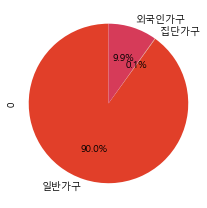

In [20]:
colors =  ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]
df_second_3[2:5].plot.pie(y=df_second_1[2:5].index,
           shadow=False,
           colors=colors, 
           startangle=90,
           figsize=(3, 3),
           autopct='%1.1f%%')

plt.axis('equal')
plt.tight_layout()
plt.show()

In [21]:
# 3) 서울시에서 남자 여자별로 가장 많이 거주하고 있는 구는 어딜까?

In [22]:
df_third =  df.loc[:,['자치구','동','총가구','총가구.1','총가구.2','총가구.3']]
df_third =  df_third[df_third['동'] == '소계']
df_third = df_third.reset_index(drop = True) 
del df_third['동']
df_third.columns = ["자치구", "총가구수", "총가구인원","총가구인원 남자","총가구인원 여자"]

In [23]:
df_third['총가구인원 남자'] = df_third['총가구인원 남자'].astype('int64')
df_third['총가구인원 남자'].idxmax()

23

In [24]:
print(df_third.iloc[df_third['총가구인원 남자'].idxmax()]) #남자가 제일 많은 구, 여자도 마찬가지

자치구            송파구
총가구수        235101
총가구인원       634941
총가구인원 남자    309336
총가구인원 여자    325605
Name: 23, dtype: object


In [25]:
df_third['총가구인원 여자'] = df_third['총가구인원 여자'].astype('int64')
print(df_third.iloc[df_third['총가구인원 여자'].idxmax()])

자치구            송파구
총가구수        235101
총가구인원       634941
총가구인원 남자    309336
총가구인원 여자    325605
Name: 23, dtype: object


In [26]:
# 2. 서울시 가구원수별 가구 수(동별) 통계

In [27]:
df = pd.read_excel("서울시 가구원수별 가구수(동별) 통계.xls")
df.head(5)

,기간,자치구,동,일반가구,일반가구.1,일반가구.2,일반가구.3,일반가구.4,일반가구.5,일반가구.6,일반가구.7
0,기간,자치구,동,계,1인가구,2인가구,3인가구,4인가구,5인가구,6인가구,7인이상 가구
1,2015,합계,합계,3784490,1115744,930467,817440,701945,169436,38547,10911
2,2015,종로구,소계,61580,22776,15314,11272,8840,2535,628,215
3,2015,종로구,사직동,3562,1125,1006,731,500,145,40,15
4,2015,종로구,삼청동,1092,363,296,214,151,45,14,9


In [28]:
# 1) 가구 인원별 총 가구 수를 막대그래프로 나타내기 

In [29]:
s = df.iloc[[1]]
del s['기간']
del s['자치구']
del s['동']
del s['일반가구']
s.columns = ['1인가구','2인가구','3인가구','4인가구','5인가구','6인가구','7인가구']
s = s.stack()
s = s[1] #멀티 인덱스 제거

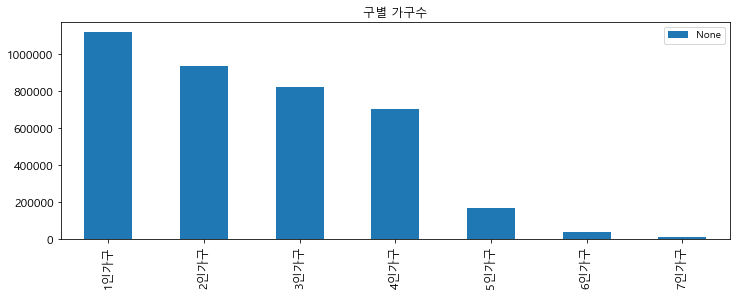

In [30]:
ax = s.plot(kind='bar', title='구별 가구수', figsize=(12, 4), legend=True, fontsize=12)

In [31]:
# 2) 어떤 구가 가장 1인 가구 비율이 낮은지 알아보고 파이그래프로 나타내기

In [32]:
df_sample = df.loc[:,['자치구','동','일반가구','일반가구.1']]
df_sample = df_sample[df_sample['동'] == '소계']
del df_sample['동']
df_sample.columns = ['자치구','계','1인가구']
df_sample = df_sample.reset_index(drop = True)
df_sample['1인가구 비율'] = df_sample['1인가구'] / df_sample['계']
df_sample = df_sample.set_index("자치구")

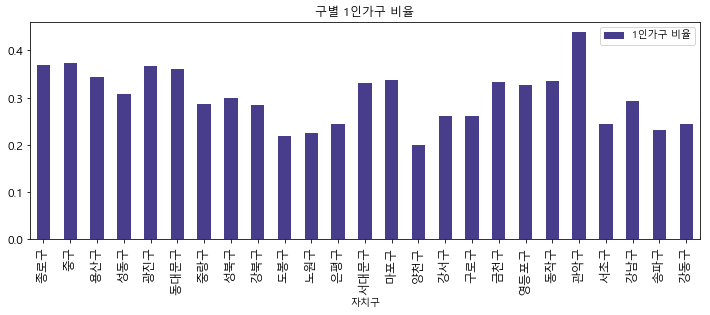

In [33]:
ax2 = df_sample['1인가구 비율'].plot(kind='bar', title='구별 1인가구 비율', figsize=(12, 4), legend=True, fontsize=12, color='darkslateblue')

In [34]:
df_sample2 = df[df['자치구'] == '관악구']
df_sample2 = df_sample2[df_sample2['동'] == '소계']
del df_sample2['기간']
del df_sample2['일반가구']
del df_sample2['동']
del df_sample2['일반가구.7'] #7인 가구 생략
df_sample2 = df_sample2.reset_index(drop = True)
df_sample2.columns = ['자치구','1인가구','2인가구','3인가구','4인가구','5인가구','6인가구']
df_sample2 = df_sample2.set_index("자치구")
categories = ['1인가구','2인가구','3인가구','4인가구','5인가구','6인가구']

In [35]:
df_sample2

,1인가구,2인가구,3인가구,4인가구,5인가구,6인가구
자치구,,,,,,
관악구,100302,51894,37713,29232,7290,1709


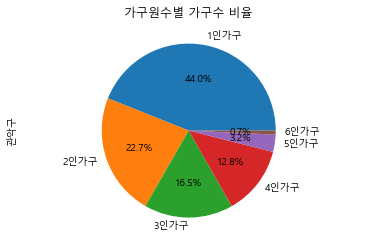

In [36]:
plt.axis('equal')
plt.title('가구원수별 가구수 비율')
df_sample2.loc['관악구'].plot(kind='pie', autopct='%0.1f%%')

In [37]:
# 3. 서울시 1인 가구(연령별) 통계

In [38]:
df = pd.read_excel("서울시 1인가구(연령별) 통계.xls")
df.head(7)

,기간,구분,성별,합계,20세미만,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상
0,2015,합계,계,1115744,13721,93068,165410,157667,105540,94750,82138,77390,77679,62250,56374,50095,39946,24674,15042
1,2015,합계,남자,544059,5604,37155,84013,89993,60969,56732,50215,45825,38696,26040,19525,13667,8777,4257,2591
2,2015,합계,여자,571685,8117,55913,81397,67674,44571,38018,31923,31565,38983,36210,36849,36428,31169,20417,12451
3,2015,종로구,계,22776,396,2455,3634,2754,1739,1707,1651,1625,1534,1299,1107,1120,802,577,376
4,2015,종로구,남자,11608,134,1122,2001,1540,951,983,982,1075,850,668,475,390,213,131,93
5,2015,종로구,여자,11168,262,1333,1633,1214,788,724,669,550,684,631,632,730,589,446,283
6,2015,중구,계,19161,282,1412,2512,2291,1586,1666,1615,1534,1499,1176,1031,938,810,476,333


In [39]:
# 합계를 연령별, 남녀별로 그래프로 나타내고 분석하기

In [40]:
del df['기간']
df = df[df['성별'] == '계']
df = df.drop(0,0)
del df['성별']
df = df.set_index("구분")

In [41]:
df_sample = df.loc[:,['20~24세','25~29세','30~34세','35~39세','20~24세','25~29세','30~34세','35~39세']]
df_sample.columns = ['20세미만','20대','30대','40대','50대','60대','70대','80대이상']
df_sample['20세미만'] = df['20세미만']
df_sample['20대'] = df['20~24세'] + df['25~29세']
df_sample['30대'] = df['30~34세'] + df['35~39세']
df_sample['40대'] = df['40~44세'] + df['45~49세']
df_sample['50대'] = df['50~54세'] + df['55~59세']
df_sample['60대'] = df['60~64세'] + df['65~69세']
df_sample['70대'] = df['70~74세'] + df['75~79세']
df_sample['80대이상'] = df['80~84세'] + df['85세이상']

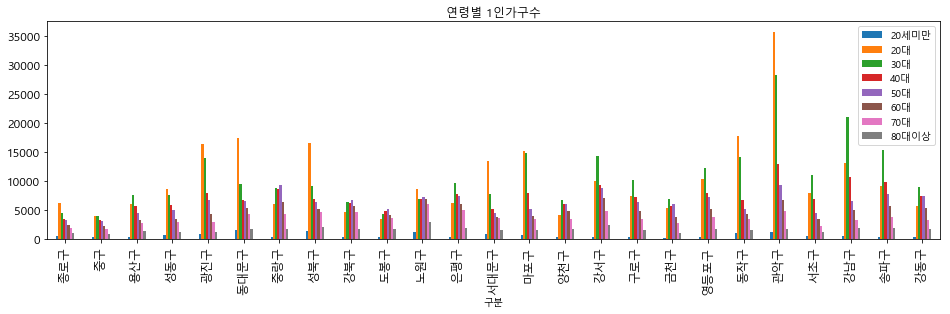

In [42]:
ax = df_sample.plot(kind='bar', title='연령별 1인가구수', figsize=(16, 4), legend=True, fontsize=12)

In [43]:
# 1) 청년층, 중년층, 노년층 비율이 가장 높은 구는 어딜까(파이 그래프)?

#청년층(20이하 ~ 34), 중년층(35 ~ 54), 노년층(55 ~ 74)

In [44]:
df_sample2 = df.loc[:,['20~24세','25~29세','30~34세',]]
df_sample2.columns = ['청년층','중년층','노년층']
df_sample2['청년층'] = df['20세미만'] + df['20~24세'] + df['25~29세']+ df['30~34세'] 
df_sample2['중년층'] = df['35~39세']  + df['40~44세'] + df['45~49세']+ df['50~54세'] 
df_sample2['노년층'] = df['55~59세']  + df['60~64세'] + df['65~69세']+ df['70~74세'] 

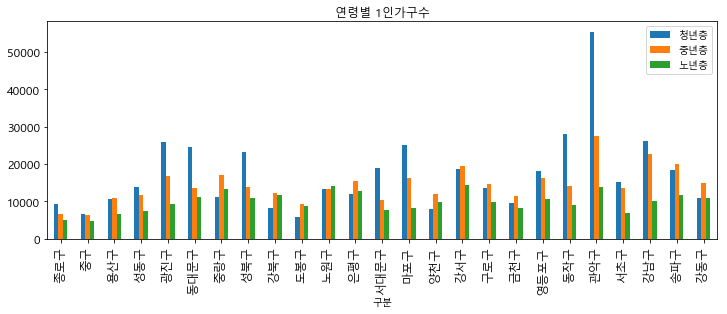

In [45]:
ax2 = df_sample2.plot(kind='bar', title='연령별 1인가구수', figsize=(12, 4), legend=True, fontsize=12)

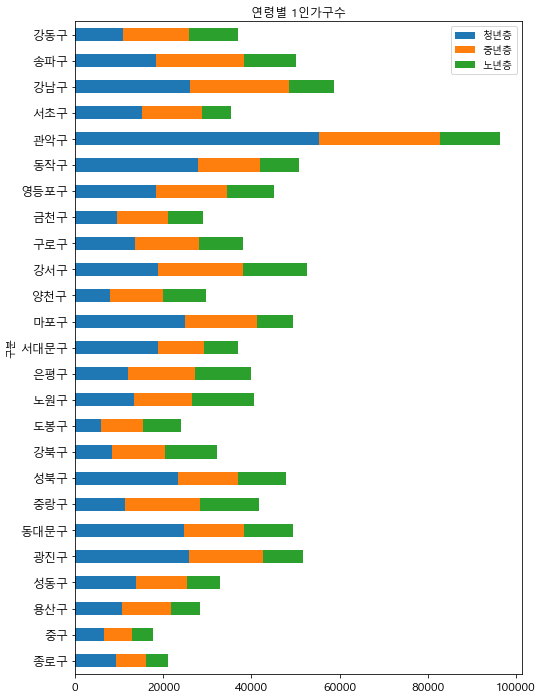

In [46]:
ax3 = df_sample2.plot(kind='barh', title='연령별 1인가구수', figsize=(8, 12), legend=True, fontsize=12, stacked=True)

In [47]:
# 2) 구별로 남녀별 합계를 막대그래프로 나타내서 어떤 구가 남녀 가구 수 차이가 심할지 분석하기

In [48]:
df = pd.read_excel("서울시 1인가구(연령별) 통계.xls")

In [49]:
del df['기간']
df= df.drop([0,1,2])
df_man = df[df['성별'] == '남자']
df_female = df[df['성별'] == '여자']
df_man = df_man.reset_index(drop = True)
df_female = df_female.reset_index(drop = True)
df_man = df_man.loc[:, ['구분','성별','합계']]
df_female = df_female.loc[:, ['구분','성별','합계']]
df_man = df_man.set_index("구분")
df_female = df_female.set_index("구분")

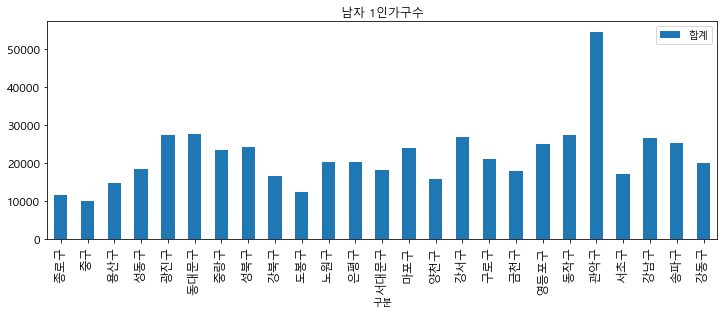

In [50]:
ax = df_man.plot(kind='bar', title='남자 1인가구수', figsize=(12, 4), legend=True, fontsize=12)

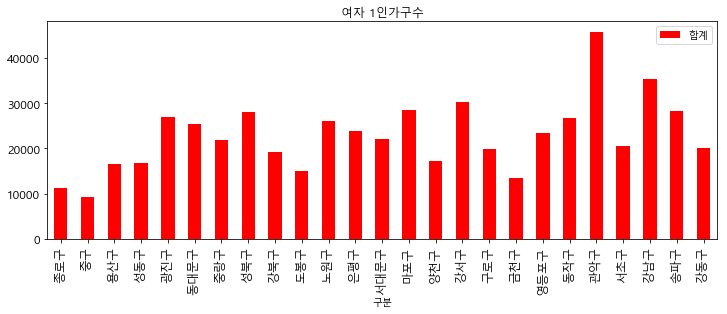

In [51]:
ax2 = df_female.plot(kind='bar', title='여자 1인가구수', color = 'red', figsize=(12, 4), legend=True, fontsize=12)

In [52]:
del df_man['성별']
df_man.columns = ['남자']
del df_female['성별']
df_female.columns = ['여자']
df_sample = pd.concat([df_man,df_female], axis=1)

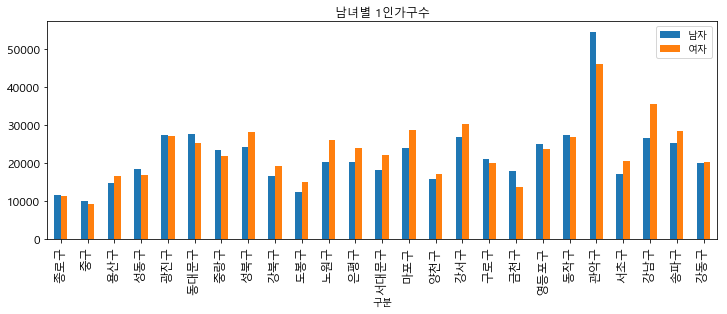

In [53]:
ax = df_sample.plot(kind='bar', title='남녀별 1인가구수', figsize=(12, 4), legend=True, fontsize=12)

In [54]:
# 4. 서울시 1인 가구(거처종류별) 통계

In [55]:
data = pd.read_excel("서울시 1인가구(거처종류별) 통계.xls")

In [56]:
data

,기간,자치구,성별,합계,주택(거처)의 종류,주택(거처)의 종류.1,주택(거처)의 종류.2,주택(거처)의 종류.3,주택(거처)의 종류.4,주택(거처)의 종류.5,주택이외의 거처
0,기간,자치구,성별,합계,계,단독주택,아파트,연립주택,다세대주택,비거주용 건물내 주택,주택이외의 거처
1,2015,합계,계,1115744,982577,521776,237913,17387,161031,44470,133167
2,2015,합계,남자,544059,470178,268511,95388,7277,73732,25270,73881
3,2015,합계,여자,571685,512399,253265,142525,10110,87299,19200,59286
4,2015,종로구,계,22776,19080,11170,2876,812,3212,1010,3696
5,2015,종로구,남자,11608,9403,5796,1355,295,1402,555,2205
6,2015,종로구,여자,11168,9677,5374,1521,517,1810,455,1491
7,2015,중구,계,19161,15353,6902,5467,300,1906,778,3808
8,2015,중구,남자,9934,7559,3535,2472,140,959,453,2375
9,2015,중구,여자,9227,7794,3367,2995,160,947,325,1433


In [57]:
# 1) 강남 구에서 남녀별 가장 많은 거주 형태를 파악하고 다른 구와 비교하여 비율이 어느 정도인지 분석하기

In [58]:
# 서울특별시 구별 전체 1인 가구수 데이터 추출
df1 = (data.loc[data['성별']=="계", ["합계"]]).drop(1, 0)
index = (data.loc[data['성별']=="계", ["자치구"]]).drop(1, 0)
df1 = df1.rename(index = index["자치구"][0:25])

# 강남 구 남녀별 1인 가구 거주 형태 데이터 추출
df2 = data.loc[71:72:, "주택(거처)의 종류.1": "주택이외의 거처"]
df2 = df2.rename(index = data["성별"][71:73], columns = data.T[0]["주택(거처)의 종류.1": "주택이외의 거처"]).T

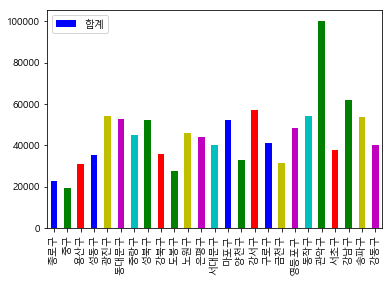

In [59]:
# 막대그래프로 서울특별시 구별 전체 1인 가구수 나타내기
df1.plot.bar(color=my_colors)

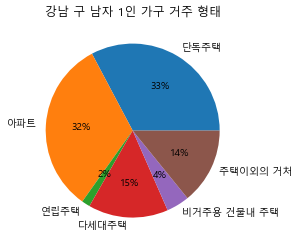

In [60]:
# 파이그래프로 강남 구 남자 1인 가구 거주 형태 비율 나타내기
fig = plt.figure()
ax = plt.subplot(1, 1, 1)
plt.title('강남 구 남자 1인 가구 거주 형태')
ax.pie(df2["남자"], labels = data.T[0]["주택(거처)의 종류.1": "주택이외의 거처"], autopct='%1.f%%')
plt.show()

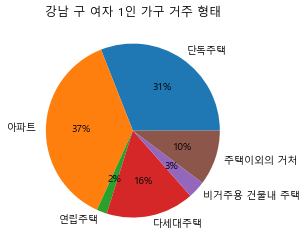

In [61]:
# 파이그래프로 강남 구 여자 1인 가구 거주 형태 비율 나타내기
fig = plt.figure()
ax = plt.subplot(1, 1, 1)
plt.title('강남 구 여자 1인 가구 거주 형태')
ax.pie(df2["여자"], labels = data.T[0]["주택(거처)의 종류.1": "주택이외의 거처"], autopct='%1.f%%')
plt.show()

In [62]:
# 2) 단독주택보다 아파트 주택에 사는 가구가 더 많은 행 출력

In [63]:
# 단독주택보다 아파트 주택에 사는 가구 데이터 추출(구, 단독주택, 아파트 수 출력)
df3 = (((data.loc[data["주택(거처)의 종류.1"]<data["주택(거처)의 종류.2"], "자치구":"주택(거처)의 종류.2"])).drop("합계", 1)).drop("주택(거처)의 종류", 1)
df3 = (df3.rename(columns = df3.T[0]["자치구":"주택(거처)의 종류.2"])).drop(0,0)
df3

,자치구,성별,단독주택,아파트
34,노원구,계,11384,26805
35,노원구,남자,6141,9449
36,노원구,여자,5243,17356
49,강서구,계,16795,18507
51,강서구,여자,8114,10822
70,강남구,계,19639,21786
72,강남구,여자,10965,13200


In [64]:
# 5. 서울시 1인 가구(혼인상태별) 통계

In [65]:
data = pd.read_excel("서울시 1인가구(혼인상태별) 통계.xls");

In [66]:
data

,기간,구분,전체,전체.1,전체.2,전체.3,전체.4,여성,여성.1,여성.2,여성.3,여성.4,남성,남성.1,남성.2,남성.3,남성.4
0,기간,구분,계,미혼,유배우,사별,이혼,소계,미혼,유배우,사별,이혼,소계,미혼,유배우,사별,이혼
1,2015,합계,1114964,666685,90634,204096,153549,603317,315590,40503,170254,76970,511647,351095,50131,33842,76579
2,2015,20세미만,12612,12612,-,-,-,6839,6839,-,-,-,5773,5773,-,-,-
3,2015,20~24세,93906,93766,82,9,49,57066,56981,46,9,30,36840,36785,36,-,19
4,2015,25~29세,157730,155884,1596,13,237,79003,77813,1011,6,173,78727,78071,585,7,64
5,2015,30세~34세,144964,137032,6065,47,1820,63607,59790,2746,25,1046,81357,77242,3319,22,774
6,2015,35세~39세,100013,87127,7363,200,5323,43723,38039,2684,89,2911,56290,49088,4679,111,2412
7,2015,40세~44세,88614,66794,9785,466,11569,37380,27625,3363,328,6064,51234,39169,6422,138,5505
8,2015,45세~49세,75893,43922,11754,1370,18847,31778,16993,4305,956,9524,44115,26929,7449,414,9323
9,2015,50세~54세,72223,27993,12726,4616,26888,33118,10963,5346,3531,13278,39105,17030,7380,1085,13610


In [67]:
# 1) 미혼 가구는 어떤 연령대가 가장 많은지 그리고 그 연령대에서 남성이 더 많은지 여성이 더 많은지 비교한다. 

In [68]:
# 미혼 1인 가구 데이터 추출
df1 = data.loc[2:16, ["전체.1"]]
df2 = data.loc[2:16, ["남성.1", "여성.1"]]
df1 = df1.rename(index = data["구분"][2:17], columns = {"전체.1": "전체"})
df2 = df2.rename(index = data["구분"][2:17], columns = {"남성.1": "남자", "여성.1": "여자"})

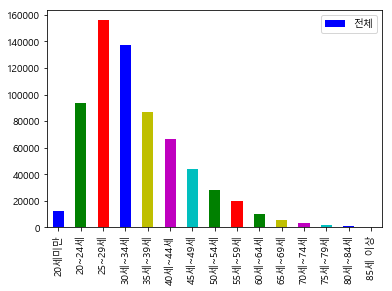

In [69]:
# 막대그래프로 미혼 전체 1인 가구수 조사
df1.plot.bar(color=my_colors)

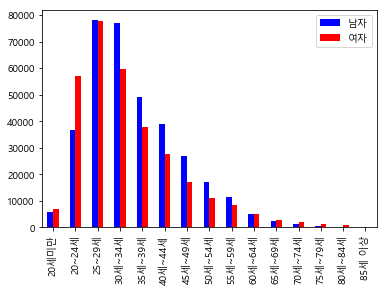

In [70]:
# 막대그래프로 미혼 남녀별 1인 가구수 조사
df2.plot.bar(color=my_colors2)

In [71]:
# 2) 40대 이후 여성과 남성의 사별 가구 수 차이가 극심한 이유를 분석하기 위해 파이그래프로 사별 비율을 알아보고 
#   막대그래프로 남녀 사별 가구 수를 비교한다. 

In [72]:
# 40대 이후 사별 1인 가구 데이터 추출
df3 = data.loc[7:16, ["전체.3"]]
df4 = data.loc[7:16, ["남성.3", "여성.3"]]
df3 = df3.rename(index = data["구분"][7:17], columns = {"전체.3": "전체"})
df4 = df4.rename(index = data["구분"][7:17], columns = {"남성.3": "남자", "여성.3": "여자"})

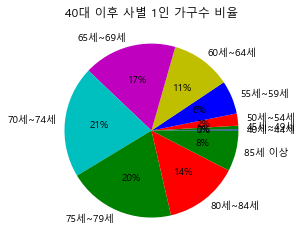

In [73]:
# 파이 그래프로 사별 비율 나타내기
fig = plt.figure()
ax = plt.subplot(1, 1, 1)
plt.title('40대 이후 사별 1인 가구수 비율')
ax.pie(df3["전체"], labels = data["구분"][7:17], colors = my_colors, autopct='%1.f%%')
plt.show()

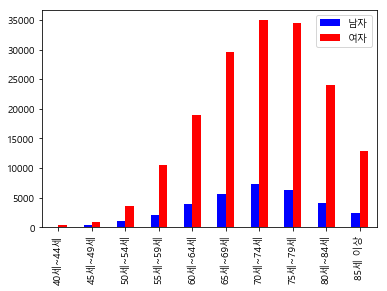

In [74]:
# 막대 그래프로 남녀별 사별 1인 가구수 나타내기
df4.plot.bar(color=my_colors2)